# Check linear fragments

Check small linear fragments in FP and GA for number of dummy atoms in order to determine whether they are terminal.

In [16]:
import glob
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read fragment library

In [2]:
path_to_library = '/home/paula/Masterarbeit/FragmentLibrary/'

# list of folders for each subpocket
subpockets = ['AP', 'FP', 'SE', 'GA', 'B1', 'B2']
folders = [path_to_library+subpocket for subpocket in subpockets]

In [85]:
data = pd.DataFrame()

# iterate over subpockets
for i, folder in enumerate(folders):
    
    subpocket = subpockets[i]
    
    file = folder+'/'+subpocket+'.sdf' 
    df = pd.DataFrame()
    suppl = Chem.SDMolSupplier(file, removeHs=False)
        
    fragments = []
    fragments_2D = [] 
    n_atoms = []
    smiles = []

    for frag in suppl:

        fragments.append(frag)
        # 2D coordinates
        frag = Chem.RemoveHs(frag)
        tmp = AllChem.Compute2DCoords(frag)
        fragments_2D.append(frag)
        n_atoms.append(frag.GetNumHeavyAtoms())
        smiles.append(Chem.MolToSmiles(frag))
        
    df['Mol'] = fragments
    df['Mol_2D'] = fragments_2D
    df['subpocket'] = subpocket
    df['n_atoms'] = n_atoms
    df['smiles'] = smiles
    
    data = data.append(df)
    
data = data.reset_index(drop=True)
data.shape

(7201, 5)

In [53]:
df_AP = data[data.subpocket=='AP']
df_FP = data[data.subpocket=='FP']
df_SE = data[data.subpocket=='SE']
df_GA = data[data.subpocket=='GA']
df_B1 = data[data.subpocket=='B1']
df_B2 = data[data.subpocket=='B2']

## Check linear fragments in FP 
Choose only fragments with less than 5 heavy atoms:

In [54]:
# small fragments in FP
small_FP = df_FP[df_FP.n_atoms < 5]
small_FP.shape

(195, 5)

Count number of dummy atoms in those fragments:

In [80]:
small_FP.smiles.str.count('\*').value_counts()

1    170
2     25
Name: smiles, dtype: int64

#### Conclusion: Most small linear fragments in FP are terminal.

Draw all small linear fragments in FP:

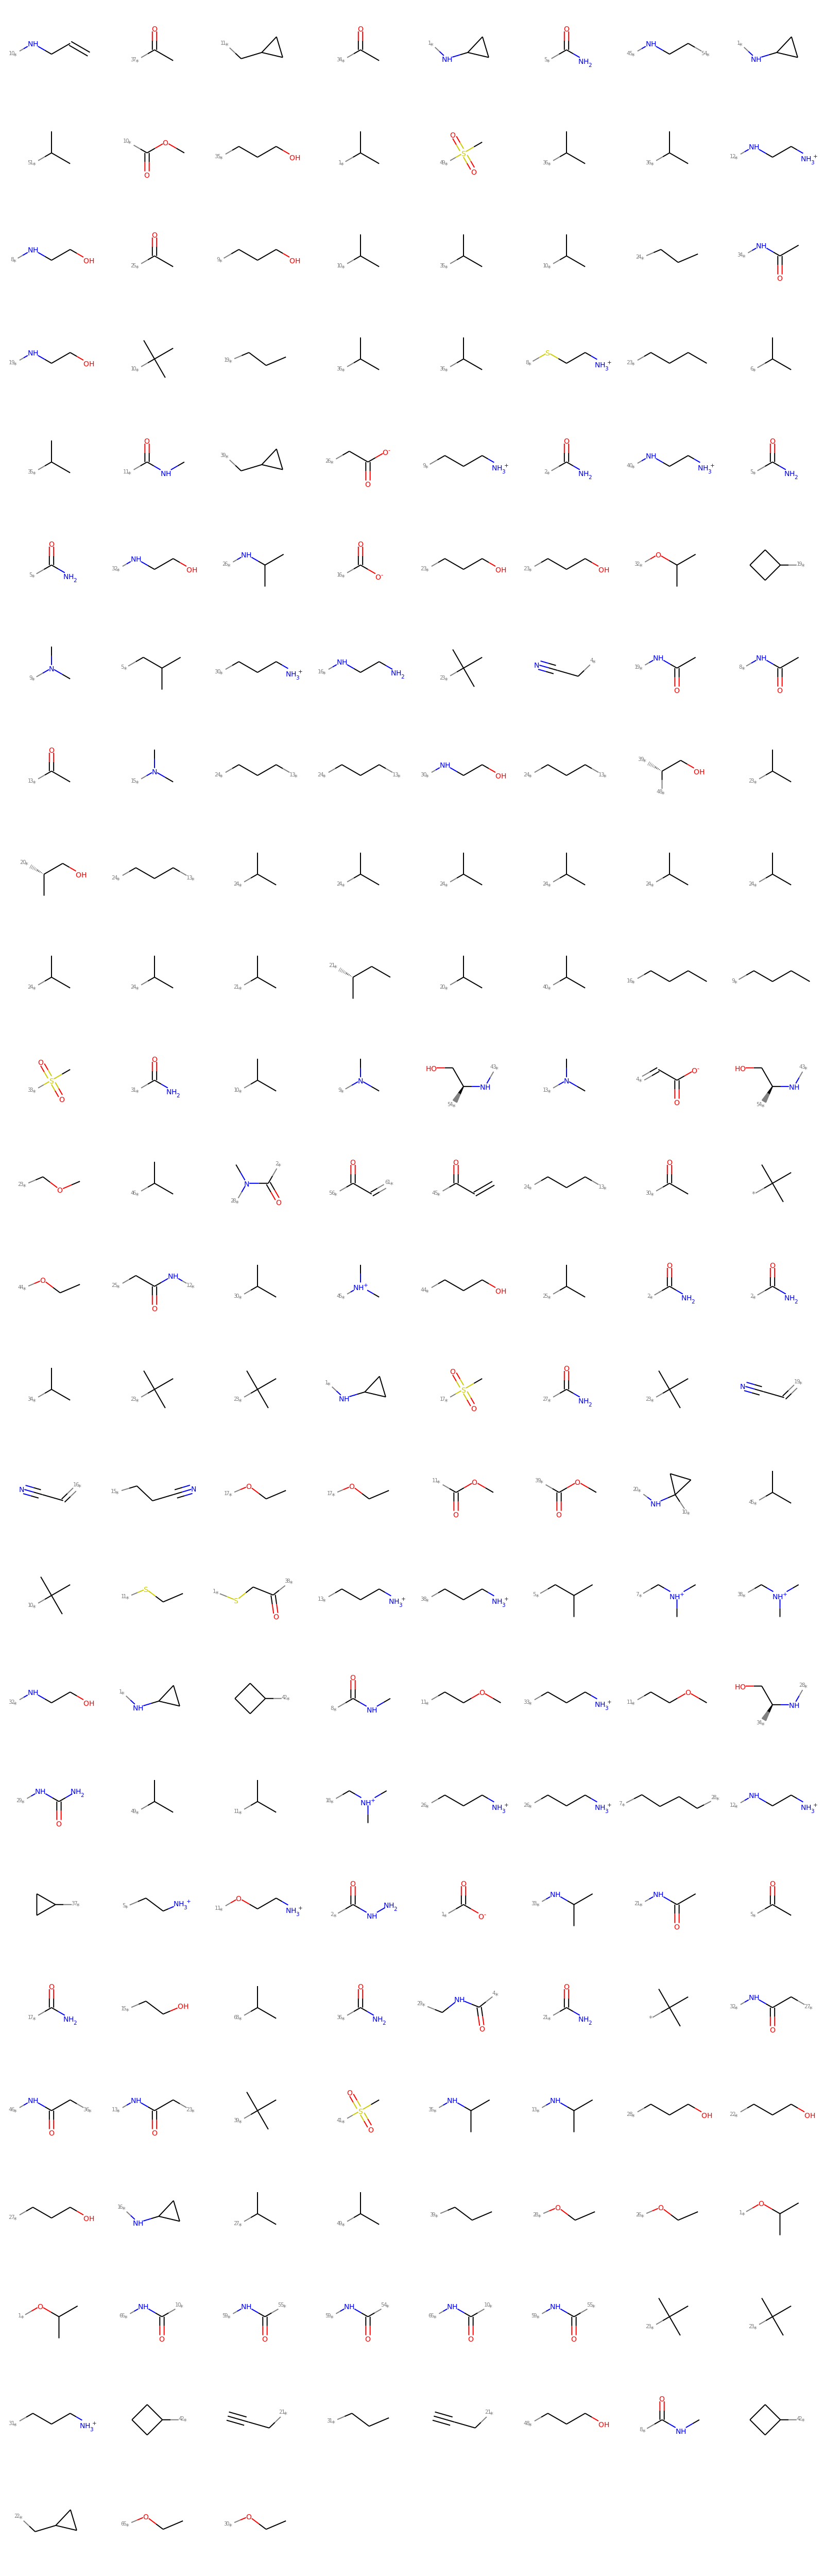

In [56]:
# draw all small fragments in FP
Draw.MolsToGridImage(list(small_FP.Mol_2D), molsPerRow=8, maxMols=200)

## Check linear fragments in GA
Choose only fragments with less than 5 heavy atoms:

In [82]:
# small fragments in GA
small_GA = df_GA[df_GA.n_atoms < 5]
small_GA.shape

(185, 5)

Count number of dummy atoms in those fragments:

In [83]:
small_GA.smiles.str.count('\*').value_counts()

1    177
2      8
Name: smiles, dtype: int64

#### Conclusion: Most small linear fragments in GA are terminal.

Draw all small linear fragments in GA:

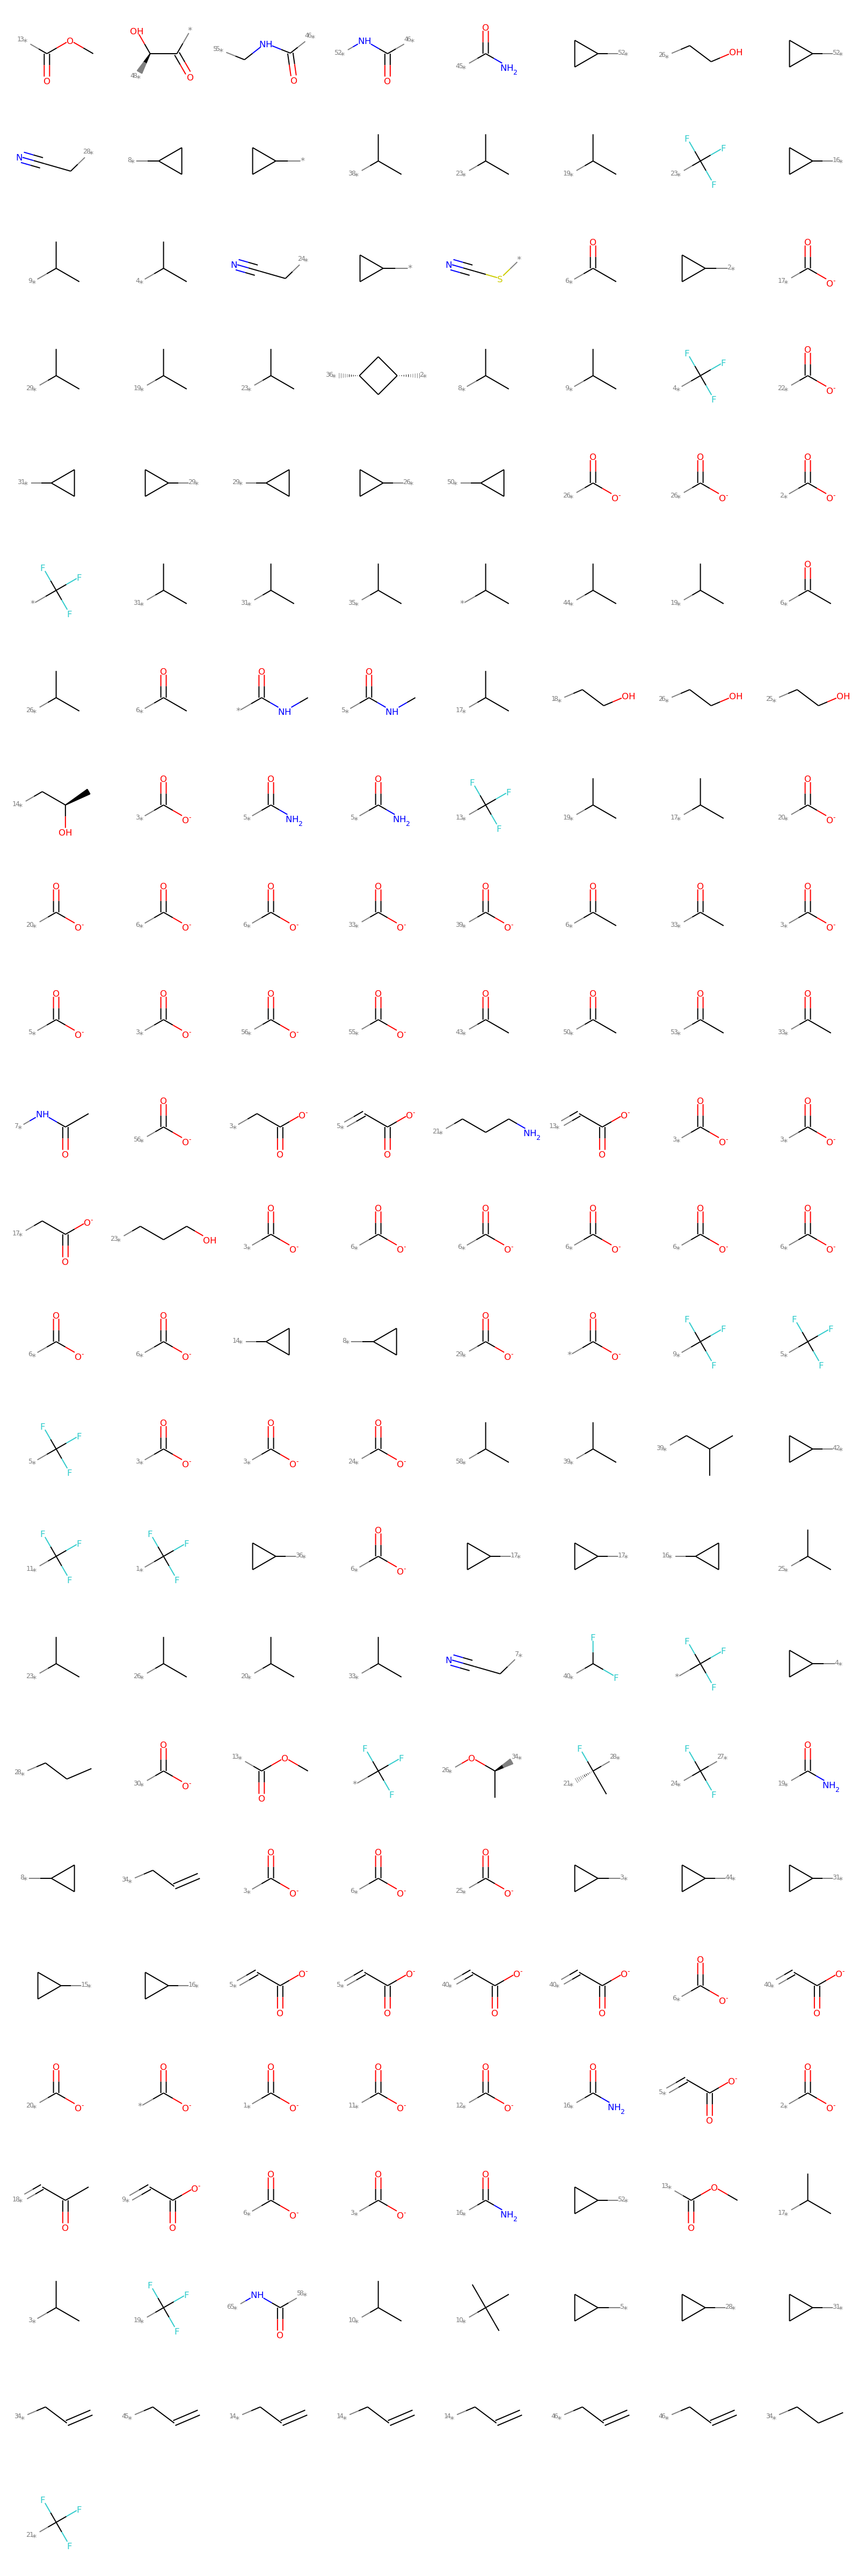

In [84]:
# draw all small fragments in GA
Draw.MolsToGridImage(list(small_GA.Mol_2D), molsPerRow=8, maxMols=200)